# WiMLDS

Poznan, 10th December 2018

## "How to talk better in ML project" - Martyna Urbanek-Trzeciak*

*Data Analyst, FANDOM

Data science is a crosstalk between computer science, statistics and business knowledge. The cross-disciplinarity and need to communicate with both product and engineering teams creates opportunities for self development but may give us a headache. During this presentation we will talk about communication in ML projects across a company from data analyst’s perspective. We will talk about data culture, create visualizations that may help present basic modelling results (notebook with Python code will be shared) and discuss examples when communication fails and how to resolve those situations.

key words: Data culture; ML visualization; Python/matplotlib
level: entry level Python, matplotlib and sklearn

In [1]:
# silent warnings
import warnings
warnings.filterwarnings('ignore')
def warn(*args, **kwargs):
    pass
warnings.warn = warn

# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling algorithms
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier


# plots settings
fandom_palette = ['#00D6D6', '#002A32', '#EE1A41', '#DFEC24', '#006661',
                '#460084', '#5DF2AE', '#FF6A64', '#833C58', '#00ACAC','#5F7A7B']
sns.set_palette(fandom_palette)

## Data preparation

Dataset (Kaggle):

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

The content is daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training your binary classification model. If you don't exclude it, you will leak the answers to your model and reduce its predictability.

In [2]:
# import data
data = pd.read_csv("weatherAUS.csv")

# remove columns with high percentage of nans
data = data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date'],
                 axis=1)
# drop nans
data.dropna(how='any', inplace=True)

# removing outliers
z = np.abs(stats.zscore(data._get_numeric_data()))
data = data[(z < 3).all(axis=1)]

# categorical data
data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
data = pd.get_dummies(data, columns=categorical_columns)

data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
count,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,...,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000
mean,12.564709,23.653387,1.482925,39.773733,14.692504,19.064199,67.381346,50.343930,1017.754662,1015.345157,...,0.057209,0.057645,0.066266,0.070327,0.072607,0.055429,0.062067,0.058080,0.052332,0.052147
std,6.251908,6.917637,3.904974,11.967334,7.663969,8.017655,18.511889,20.404615,6.733285,6.691289,...,0.232242,0.233071,0.248748,0.255698,0.259492,0.228816,0.241278,0.233896,0.222698,0.222325
min,-6.000000,4.100000,0.000000,7.000000,2.000000,2.000000,11.000000,0.000000,996.400000,994.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.300000,23.200000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.100000,28.700000,0.600000,48.000000,20.000000,24.000000,81.000000,64.000000,1022.300000,1019.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.400000,44.600000,28.000000,80.000000,39.000000,44.000000,100.000000,100.000000,1038.500000,1035.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107868 entries, 0 to 142192
Data columns (total 62 columns):
MinTemp            107868 non-null float64
MaxTemp            107868 non-null float64
Rainfall           107868 non-null float64
WindGustSpeed      107868 non-null float64
WindSpeed9am       107868 non-null float64
WindSpeed3pm       107868 non-null float64
Humidity9am        107868 non-null float64
Humidity3pm        107868 non-null float64
Pressure9am        107868 non-null float64
Pressure3pm        107868 non-null float64
Temp9am            107868 non-null float64
Temp3pm            107868 non-null float64
RainToday          107868 non-null int64
RainTomorrow       107868 non-null int64
WindGustDir_E      107868 non-null uint8
WindGustDir_ENE    107868 non-null uint8
WindGustDir_ESE    107868 non-null uint8
WindGustDir_N      107868 non-null uint8
WindGustDir_NE     107868 non-null uint8
WindGustDir_NNE    107868 non-null uint8
WindGustDir_NNW    107868 non-null uint8
Wind

In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data.drop(['RainTomorrow'], axis=1),
                                                    data['RainTomorrow'], test_size=0.3, random_state=24)

In [6]:
# preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

## Creating a benchmark

In [7]:
# Dummy model most frequent

model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=5))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0    0.78925   1.00000   0.88221     25541
           1    0.00000   0.00000   0.00000      6820

   micro avg    0.78925   0.78925   0.78925     32361
   macro avg    0.39463   0.50000   0.44111     32361
weighted avg    0.62292   0.78925   0.69629     32361

[[25541     0]
 [ 6820     0]]


In [8]:
# Dummy model - stratified

model = DummyClassifier(strategy='stratified', random_state=24)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=5))
print(confusion_matrix(y_test, y_pred).T)
print((confusion_matrix(y_test, y_pred)/X_test.shape[0]*100).T)

              precision    recall  f1-score   support

           0    0.78980   0.79276   0.79128     25541
           1    0.21282   0.20982   0.21131      6820

   micro avg    0.66991   0.66991   0.66991     32361
   macro avg    0.50131   0.50129   0.50129     32361
weighted avg    0.66820   0.66991   0.66905     32361

[[20248  5389]
 [ 5293  1431]]
[[62.56914187 16.65276104]
 [16.35610766  4.42198943]]


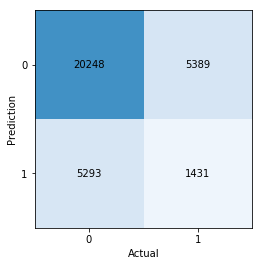

In [9]:
# visualize confusion matrix in colors
plt.imshow((confusion_matrix(y_test, y_pred)/X_test.shape[0]*100).T, 
          vmin=0, vmax=100, cmap='Blues')
for x in [0,1]:
    for y in [0,1]:
        plt.text(x, y, round(confusion_matrix(y_test, y_pred)[x][y], 1),
                 horizontalalignment='center', verticalalignment='center')

plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.yticks(np.arange(0, 2, 1.0))
plt.xticks(np.arange(0, 2, 1.0))
plt.show()

[[20248  5389]
 [ 5293  1431]]
[[79.27645746 79.01759531]
 [20.72354254 20.98240469]]


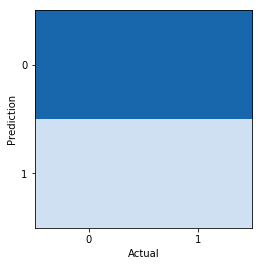

In [10]:
conf = confusion_matrix(y_test, y_pred).T
perc_df = np.divide(conf, conf.sum(axis=0))*100
print(conf)
print(perc_df)

plt.imshow(perc_df, 
          vmin=0, vmax=100,
              cmap='Blues')
plt.xticks(np.arange(0, 2, 1.0))
plt.yticks(np.arange(0, 2, 1.0))
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

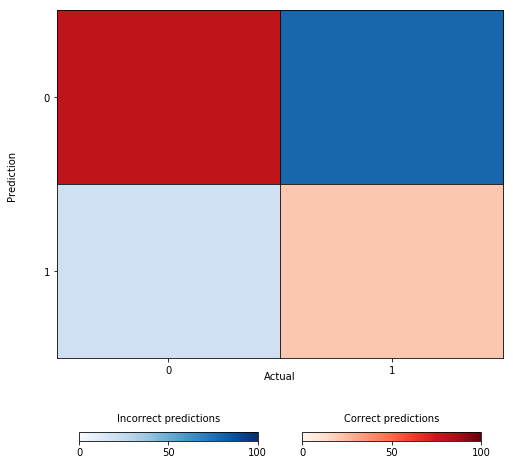

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8),
                        gridspec_kw={'height_ratios': [1,1,0.5],
                                     'wspace': 0, 'hspace': 0})
axs[0][0].imshow(perc_df[0:1, 0:1],
              aspect='auto',
              cmap='Reds',
                vmin=0, vmax=100)

axs[0][0].axes.get_xaxis().set_visible(False)
axs[0][0].set_yticks([0])
axs[0][0].set_yticklabels(['0'])

axs[0][1].imshow(perc_df[0:1, 1:2],
              aspect='auto',
              cmap='Blues',
                vmin=0, vmax=100)

axs[0][1].axes.get_xaxis().set_visible(False)
axs[0][1].axes.get_yaxis().set_visible(False)

cax = axs[1][0].imshow(perc_df[1:2, 0:1],
              aspect='auto',
              cmap='Blues',
                vmin=0, vmax=100)

axs[1][0].set_xticks([0])
axs[1][0].set_xticklabels(['0'])
axs[1][0].set_yticks([0])
axs[1][0].set_yticklabels(['1'])


cax1 = axs[1][1].imshow(perc_df[1:2, 1:2],
              aspect='auto',
              cmap='Reds',
                vmin=0, vmax=100)

axs[1][1].axes.get_yaxis().set_visible(False)
axs[1][1].set_xticks([0])
axs[1][1].set_xticklabels(['1'])



axs[2][0].axes.get_yaxis().set_visible(False)
axs[2][0].axes.get_xaxis().set_visible(False)
axs[2][0].axis('off')
axs[2][1].axes.get_yaxis().set_visible(False)
axs[2][1].axes.get_xaxis().set_visible(False)
axs[2][1].axis('off')

cbar = plt.colorbar(cax, ticks=[0, 50, 100], orientation='horizontal', ax=axs[2][0], shrink=0.8)
cbar.ax.set_xticklabels(['0', '50', '100'])  # horizontal colorbar

cbar = plt.colorbar(cax1, ticks=[0, 50, 100], orientation='horizontal', ax=axs[2][1], shrink=0.8)
cbar.ax.set_xticklabels(['0', '50', '100'])  # horizontal colorbar

plt.text(-1.2,4,'Prediction', rotation=90, horizontalalignment='center', verticalalignment='center')
plt.text(0, 0.7,'Actual', horizontalalignment='center', verticalalignment='center')
plt.text(0.5, 0,'Correct predictions', horizontalalignment='center', verticalalignment='center')
plt.text(-0.5, 0,'Incorrect predictions', horizontalalignment='center', verticalalignment='center')

plt.show()

## Creating a model

In [12]:
model = LogisticRegression(fit_intercept=True, random_state=24, class_weight='balanced', C=100,
                                 max_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=5))
print(confusion_matrix(y_test, y_pred).T)
print((confusion_matrix(y_test, y_pred)/X_test.shape[0]*100).T)

              precision    recall  f1-score   support

           0    0.92702   0.79973   0.85869     25541
           1    0.50470   0.76422   0.60792      6820

   micro avg    0.79225   0.79225   0.79225     32361
   macro avg    0.71586   0.78198   0.73330     32361
weighted avg    0.83802   0.79225   0.80584     32361

[[20426  1608]
 [ 5115  5212]]
[[63.11918668  4.9689441 ]
 [15.80606285 16.10580637]]


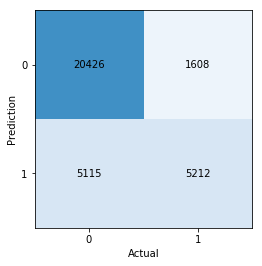

In [13]:
# visualize confusion matrix in colors
plt.imshow((confusion_matrix(y_test, y_pred)/X_test.shape[0]*100).T, 
          vmin=0, vmax=100, cmap='Blues')
for x in [0,1]:
    for y in [0,1]:
        plt.text(x, y, round(confusion_matrix(y_test, y_pred)[x][y], 1),
                 horizontalalignment='center', verticalalignment='center')

plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.yticks(np.arange(0, 2, 1.0))
plt.xticks(np.arange(0, 2, 1.0))
plt.show()

[[20426  1608]
 [ 5115  5212]]
[[79.97337614 23.57771261]
 [20.02662386 76.42228739]]


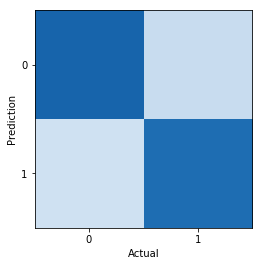

In [14]:
conf = confusion_matrix(y_test, y_pred).T
perc_df = np.divide(conf, conf.sum(axis=0))*100
print(conf)
print(perc_df)

plt.imshow(perc_df, 
          vmin=0, vmax=100,
              cmap='Blues')
plt.xticks(np.arange(0, 2, 1.0))
plt.yticks(np.arange(0, 2, 1.0))
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

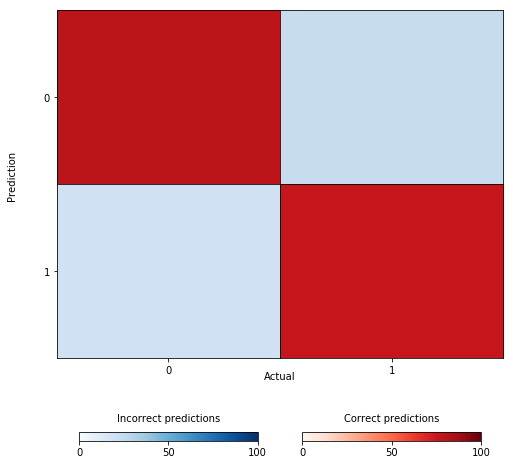

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8),
                        gridspec_kw={'height_ratios': [1,1,0.5],
                                     'wspace': 0, 'hspace': 0})
axs[0][0].imshow(perc_df[0:1, 0:1],
              aspect='auto',
              cmap='Reds',
                vmin=0, vmax=100)

axs[0][0].axes.get_xaxis().set_visible(False)
axs[0][0].set_yticks([0])
axs[0][0].set_yticklabels(['0'])

axs[0][1].imshow(perc_df[0:1, 1:2],
              aspect='auto',
              cmap='Blues',
                vmin=0, vmax=100)

axs[0][1].axes.get_xaxis().set_visible(False)
axs[0][1].axes.get_yaxis().set_visible(False)

cax = axs[1][0].imshow(perc_df[1:2, 0:1],
              aspect='auto',
              cmap='Blues',
                vmin=0, vmax=100)

axs[1][0].set_xticks([0])
axs[1][0].set_xticklabels(['0'])
axs[1][0].set_yticks([0])
axs[1][0].set_yticklabels(['1'])


cax1 = axs[1][1].imshow(perc_df[1:2, 1:2],
              aspect='auto',
              cmap='Reds',
                vmin=0, vmax=100)

axs[1][1].axes.get_yaxis().set_visible(False)
axs[1][1].set_xticks([0])
axs[1][1].set_xticklabels(['1'])



axs[2][0].axes.get_yaxis().set_visible(False)
axs[2][0].axes.get_xaxis().set_visible(False)
axs[2][0].axis('off')
axs[2][1].axes.get_yaxis().set_visible(False)
axs[2][1].axes.get_xaxis().set_visible(False)
axs[2][1].axis('off')

cbar = plt.colorbar(cax, ticks=[0, 50, 100], orientation='horizontal', ax=axs[2][0], shrink=0.8)
cbar.ax.set_xticklabels(['0', '50', '100'])  # horizontal colorbar

cbar = plt.colorbar(cax1, ticks=[0, 50, 100], orientation='horizontal', ax=axs[2][1], shrink=0.8)
cbar.ax.set_xticklabels(['0', '50', '100'])  # horizontal colorbar

plt.text(-1.2,4,'Prediction', rotation=90, horizontalalignment='center', verticalalignment='center')
plt.text(0, 0.7,'Actual', horizontalalignment='center', verticalalignment='center')
plt.text(0.5, 0,'Correct predictions', horizontalalignment='center', verticalalignment='center')
plt.text(-0.5, 0,'Incorrect predictions', horizontalalignment='center', verticalalignment='center')

plt.show()

## Creating multiple models and plotting them

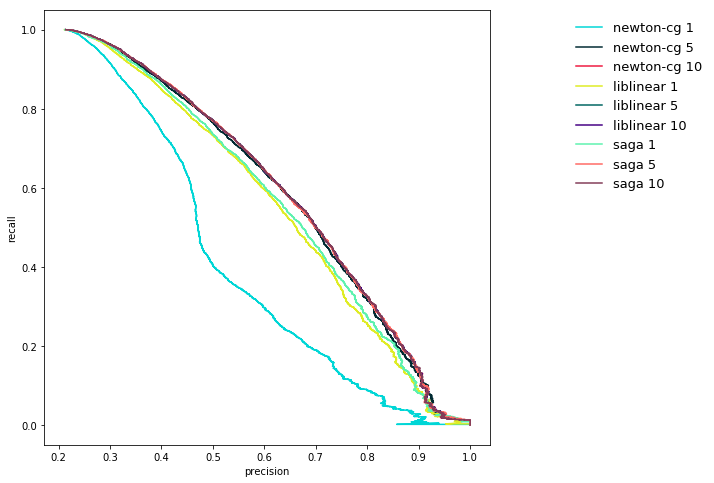

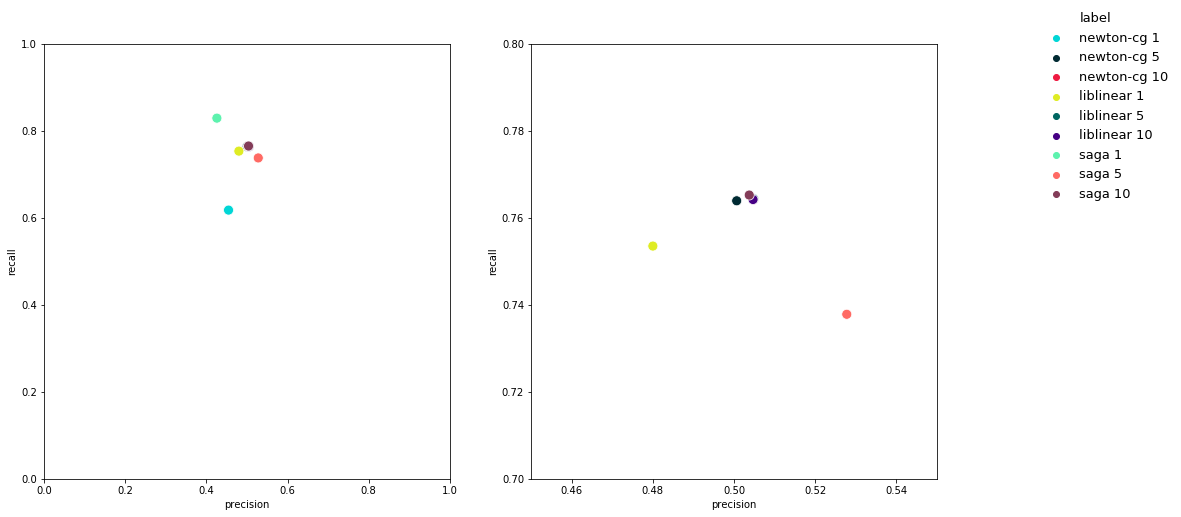

In [16]:
results = pd.DataFrame(columns=['label', 'precision', 'recall'])

fig, axs = plt.subplots(1, 1, figsize=(8, 8))

for solver in ['newton-cg', 'liblinear', 'saga']:
    for max_iter in [1, 5, 10]:
        model = LogisticRegression(fit_intercept=True, random_state=24, class_weight='balanced', 
                                   C=100, solver=solver, max_iter=max_iter)
        model.fit(X_train, y_train)
        label = solver + ' ' + str(max_iter)
        y_scores = model.predict_proba(X_test)
        y_res = model.predict(X_test)
        results = results.append(pd.DataFrame([[label, precision_score(y_test, y_res), recall_score(y_test, y_res)]], columns=['label', 'precision', 'recall']))
        precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])
        axs.plot(precision, recall, label=label)
plt.legend(bbox_to_anchor=(1.5, 1), frameon=False, fontsize=13)
plt.xlabel('precision')
plt.ylabel('recall')
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot('precision', 'recall', marker='o', hue='label', data=results, linestyle='None', ax=axs[0],
               legend=False,
               s=100)
axs[0].set_xlabel('precision')
axs[0].set_ylabel('recall')
axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)


sns.scatterplot('precision', 'recall', marker='o', hue='label', data=results, linestyle='None', ax=axs[1],
               s=100)
axs[1].set_xlabel('precision')
axs[1].set_ylabel('recall')
axs[1].set_xlim(0.45,0.55)
axs[1].set_ylim(0.7,0.8)
axs[1].legend(bbox_to_anchor=(1.6, 1.1), frameon=False, fontsize=13)

plt.show()